In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

preds = '../outputs/predictions/xgboost_optuna_vals.csv'
test = '../data/processed/processed_all.csv'

df = pd.read_csv(test)
supp = pd.read_csv(preds)

df = df[df['season'] == 2023]
df = df[(df['down'] == 3) | (df['down'] == 4)]
df["log_ydstogo"] = np.log1p(df["ydstogo"])
df["log_yardline_100"] = np.log1p(df["yardline_100"])

data = df.merge(supp, left_index=True, right_on="orig_index").drop(columns=["Unnamed: 0", "orig_index"])

In [54]:
list(data.columns)

['nflverse_game_id',
 'play_id',
 'possession_team',
 'offense_formation',
 'offense_personnel',
 'defenders_in_box',
 'defense_personnel',
 'players_on_play',
 'offense_players',
 'defense_players',
 'n_offense',
 'n_defense',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'run_location',
 'run_gap',
 'score_differential',
 'no_score_prob',
 'fg_prob',
 'td_prob',
 'ep',
 'epa',
 'wp',
 'def_wp',
 'home_wp',
 'away_wp',
 'wpa',
 'third_down_converted',
 'third_down_failed',
 'fourth_down_converted',
 'fourth_down_failed',
 'penalty',
 'field_goal_attempt',
 'complete_pass',
 'passing_yards',
 'receiving_yards',
 'rushing_yards',
 'season',
 

<Axes: xlabel='ydstogo', ylabel='y_prob'>

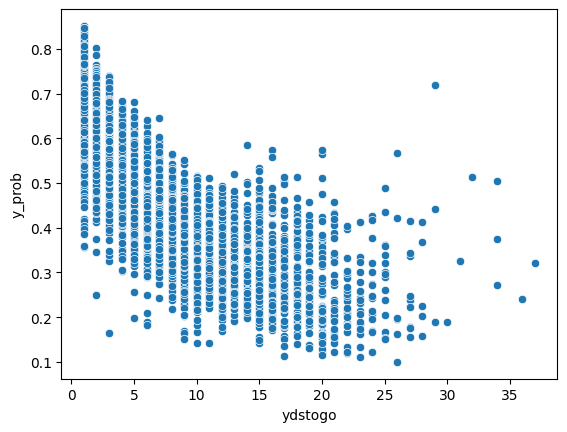

In [57]:
sns.scatterplot(data=data, x='ydstogo',y='y_prob')

In [58]:
print(len(data), len(supp))

8259 8259


<Axes: xlabel='log_ydstogo', ylabel='Count'>

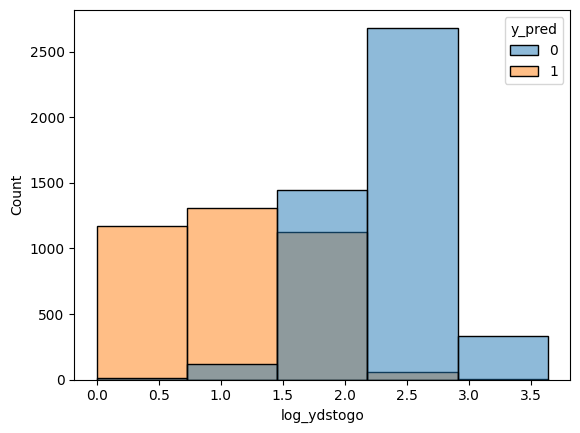

In [79]:
sns.histplot(
    data=data,
    x="log_ydstogo",
    hue="y_pred",
    bins=5,                   # ← EXACT number of bins
    binrange=(0, data['log_ydstogo'].max()),  # ← locks upper/lower bound
    multiple="layer",         # ← overlays bars
    alpha=0.5
)

<Axes: xlabel='ydstogo', ylabel='Count'>

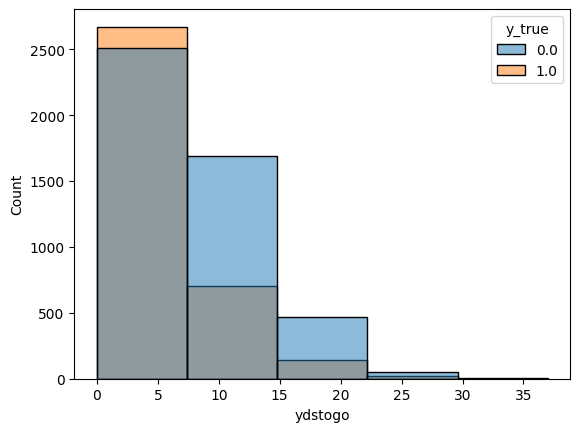

In [80]:
sns.histplot(
    data=data,
    x="ydstogo",
    hue="y_true",
    bins=5,                   # ← EXACT number of bins
    binrange=(0, data['ydstogo'].max()),  # ← locks upper/lower bound
    multiple="layer",         # ← overlays bars
    alpha=0.5
)

<Axes: xlabel='log_ydstogo', ylabel='Count'>

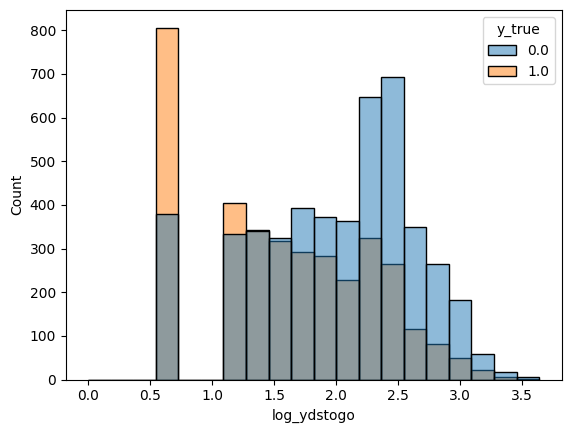

In [74]:
sns.histplot(
    data=data,
    x="log_ydstogo",
    hue="y_true",
    bins=20,                   # ← EXACT number of bins
    binrange=(0, data['log_ydstogo'].max()),  # ← locks upper/lower bound
    multiple="layer",         # ← overlays bars
    alpha=0.5
)

In [72]:
data[data['ydstogo']==4]

,nflverse_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,players_on_play,offense_players,defense_players,...,sacks,sack_rate_season,success_plays,total_plays,success_rate_season,log_ydstogo,log_yardline_100,y_true,y_pred,y_prob
36,2023_01_BUF_NYJ,1428,BUF,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 2 TE, 2 WR",4.0,"3 CB, 2 DE, 1 FS, 1 ILB, 1 NT, 2 OLB, 1 SS",00-0031936;00-0034384;00-0036501;00-0037190;00...,00-0031936;00-0035679;00-0038548;00-0034857;00...,00-0034384;00-0036501;00-0037190;00-0032416;00...,...,41,0.051768,579,1195,0.484519,1.609438,1.791759,1.0,1,0.586188
59,2023_01_CAR_ATL,755,ATL,SHOTGUN,"1 C, 2 G, 1 QB, 2 RB, 2 T, 2 TE, 1 WR",6.0,"2 CB, 2 DE, 2 DT, 1 FS, 2 ILB, 1 OLB, 1 SS",00-0036957;00-0034356;00-0036944;00-0034723;00...,00-0036957;00-0035630;00-0039048;00-0038122;00...,00-0034356;00-0036944;00-0034723;00-0036220;00...,...,37,0.072125,472,1037,0.455159,1.609438,2.484907,1.0,1,0.543552
85,2023_01_CIN_CLE,622,CLE,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",7.0,"3 CB, 2 DE, 1 DT, 1 FS, 1 ILB, 1 NT, 1 OLB, 1 SS",00-0033901;00-0032521;00-0033548;00-0037753;00...,00-0033901;00-0031426;00-0034399;00-0033537;00...,00-0032521;00-0033548;00-0037753;00-0033935;00...,...,44,0.066667,508,1153,0.440590,1.609438,3.784190,1.0,1,0.585007
99,2023_01_CIN_CLE,2942,CIN,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 4 WR",5.0,"3 CB, 2 DE, 1 DT, 1 FS, 1 MLB, 1 OLB, 2 SS",00-0032445;00-0036996;00-0037250;00-0038585;00...,00-0032445;00-0034678;00-0038095;00-0036442;00...,00-0036996;00-0037250;00-0038585;00-0033868;00...,...,54,0.062718,614,1275,0.481569,1.609438,3.526361,0.0,1,0.648453
104,2023_01_CIN_CLE,3642,CIN,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 4 WR",6.0,"3 CB, 2 DE, 1 DT, 1 FS, 3 OLB, 1 SS",00-0032445;00-0034856;00-0036996;00-0037250;00...,00-0032445;00-0034678;00-0038095;00-0036442;00...,00-0034856;00-0036996;00-0037250;00-0033868;00...,...,54,0.062718,614,1275,0.481569,1.609438,4.248495,0.0,1,0.632557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,2023_21_DET_SF,3725,SF,SHOTGUN,"2 C, 1 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"3 CB, 3 DE, 1 FS, 2 ILB, 2 SS",00-0032151;00-0032701;00-0033930;00-0036307;00...,00-0032151;00-0032701;00-0036551;00-0037834;00...,00-0033930;00-0036307;00-0036993;00-0037236;00...,...,37,0.054492,577,1258,0.458665,1.609438,3.912023,1.0,1,0.666295
8201,2023_21_KC_BAL,823,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"2 CB, 1 DT, 2 FS, 2 ILB, 1 NT, 2 OLB, 1 SS",00-0036623;00-0033281;00-0033503;00-0036130;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,00-0033281;00-0033503;00-0036130;00-0033894;00...,...,29,0.032584,669,1323,0.505669,1.609438,3.737670,1.0,1,0.541056
8210,2023_21_KC_BAL,1677,BAL,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"3 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 SS",00-0037825;00-0036374;00-0037191;00-0038043;00...,00-0037825;00-0029592;00-0036369;00-0034796;00...,00-0036374;00-0037191;00-0038043;00-0036378;00...,...,40,0.063796,516,1139,0.453029,1.609438,3.988984,0.0,1,0.597365
8241,2023_22_SF_KC,2503,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"2 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 OLB, 1 SS",00-0036623;00-0034573;00-0036563;00-0035717;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,00-0034573;00-0036563;00-0035717;00-0036321;00...,...,29,0.032584,669,1323,0.505669,1.609438,4.248495,1.0,1,0.629933


In [20]:
idx = data[data["ydstogo"] == 1]['y_prob'].idxmin()
data.loc[idx].to_dict()
data.iloc[idx]['y_prob']

np.float64(0.4030286759007941)

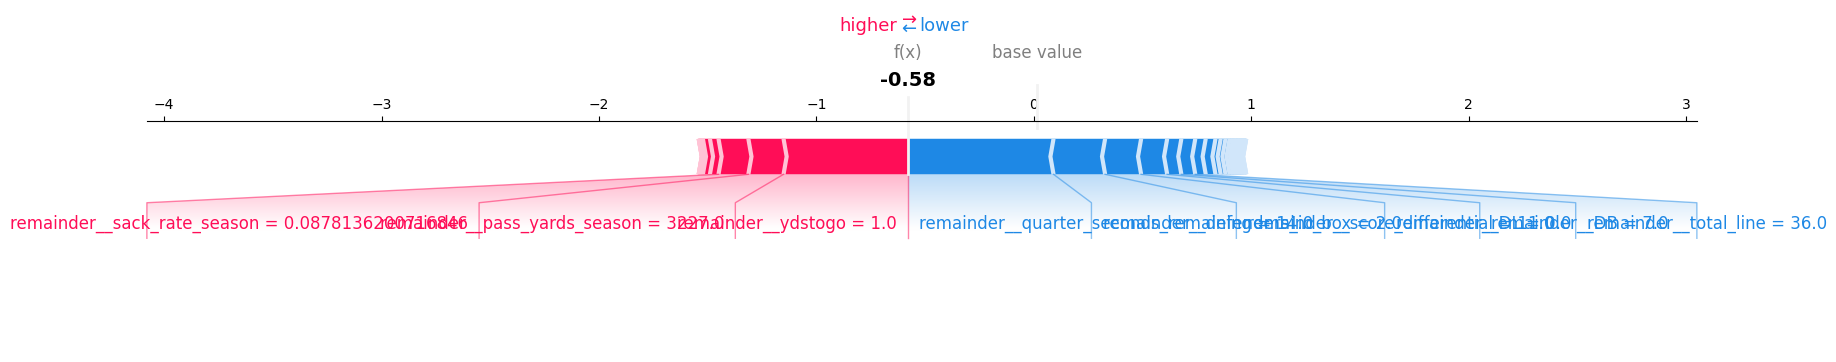

In [21]:
import yaml
import joblib
import shap
import pandas as pd

with open("../cfg/pipeline.yml") as f:
    config = yaml.safe_load(f)

COLS = config["features"]["keep"]

pipeline = joblib.load("../models/xgboost_optuna.joblib")
preproc = pipeline.named_steps["preproc"]
model = pipeline.named_steps["model"]

data = data[COLS]

# transform data
X_pre = preproc.transform(data)

# recover names from ColumnTransformer
feature_names = preproc.get_feature_names_out()

# convert to DataFrame so SHAP works better
X_pre_df = pd.DataFrame(X_pre, columns=feature_names)

# pick the SHAP values for the positive class
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_pre_df)

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_pre_df.iloc[idx],
    matplotlib=True
)

In [22]:
import shap
import numpy as np

raw_base = explainer.expected_value
raw_shap = shap_values[idx].sum()
raw_output = raw_base + raw_shap

prob_output = 1 / (1 + np.exp(-raw_output))
print(prob_output)  # should match predict_proba

0.35946742


In [23]:
shap_values = explainer.shap_values(X_pre_df)

# If binary classifier, shap_values is usually [class0, class1]
if isinstance(shap_values, list):
    shap_values = shap_values[1]   # positive class only

In [24]:
shap_values

array([[ 0.00024762,  0.02040691,  0.06931215, ..., -0.01601642,
         0.00834792,  0.00894315],
       [ 0.00030414, -0.00718438, -0.01792252, ..., -0.0223734 ,
         0.01654004,  0.02724401],
       [ 0.00029368, -0.00704858, -0.01878161, ..., -0.02472167,
         0.01352378,  0.02804008],
       ...,
       [-0.00054949, -0.00789432, -0.01392055, ...,  0.05862945,
        -0.00550789,  0.04391732],
       [ 0.00021899, -0.00123245, -0.00447968, ..., -0.01114624,
        -0.01958538, -0.00034217],
       [-0.00053787, -0.00821148, -0.01404968, ...,  0.05786738,
        -0.00332116,  0.01526392]], shape=(8259, 35), dtype=float32)

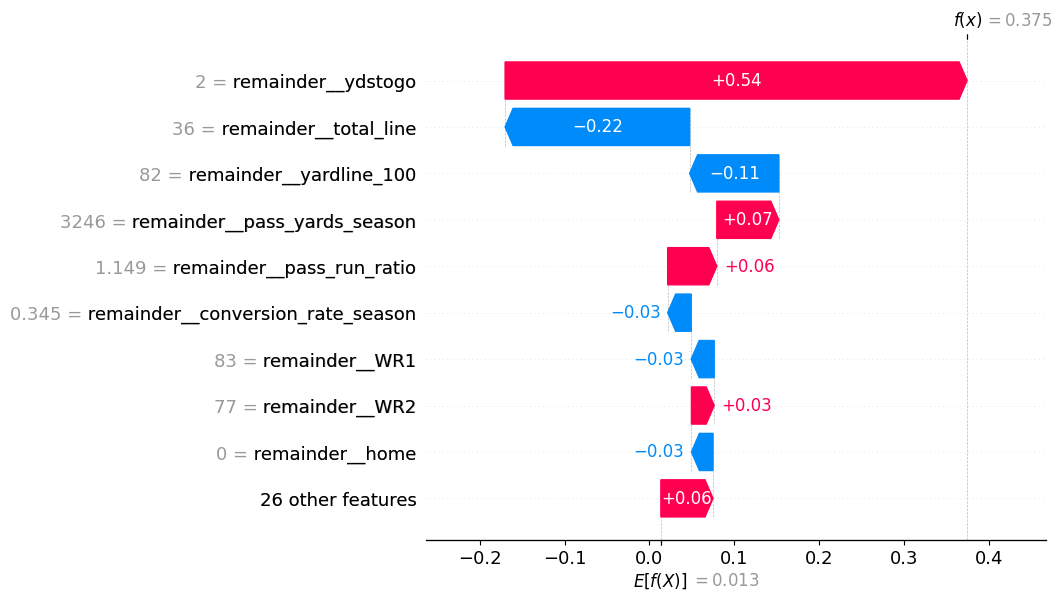

In [25]:
import shap
import numpy as np
# Build Explanation object for ONE sample
idx-=1
exp = shap.Explanation(
    values=shap_values[idx],
    base_values=explainer.expected_value,
    data=X_pre_df.iloc[idx].values,
    feature_names=feature_names
)

shap.plots.waterfall(exp)

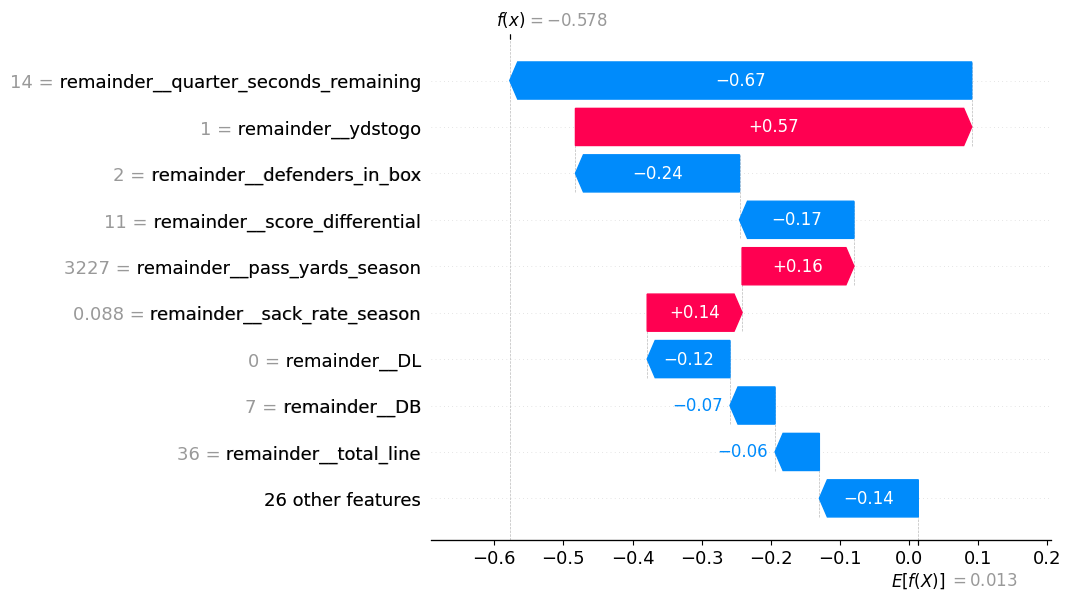

In [26]:
idx+=1
exp = shap.Explanation(
    values=shap_values[idx],
    base_values=explainer.expected_value,
    data=X_pre_df.iloc[idx].values,
    feature_names=feature_names
)

shap.plots.waterfall(exp)

In [27]:
shap_values = explainer.shap_values(X_pre)

print(type(shap_values), len(shap_values))
# if it's a list of length 2, you need to pick the class you care about: # if you want to explain proba[:, 1]

<class 'numpy.ndarray'> 8259


In [19]:
shap_values

array([[ 0.00024762,  0.02040691,  0.06931215, ..., -0.01601642,
         0.00834792,  0.00894315],
       [ 0.00030414, -0.00718438, -0.01792252, ..., -0.0223734 ,
         0.01654004,  0.02724401],
       [ 0.00029368, -0.00704858, -0.01878161, ..., -0.02472167,
         0.01352378,  0.02804008],
       ...,
       [-0.00054949, -0.00789432, -0.01392055, ...,  0.05862945,
        -0.00550789,  0.04391732],
       [ 0.00021899, -0.00123245, -0.00447968, ..., -0.01114624,
        -0.01958538, -0.00034217],
       [-0.00053787, -0.00821148, -0.01404968, ...,  0.05786738,
        -0.00332116,  0.01526392]], shape=(8259, 35), dtype=float32)